In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [350]:
df = pd.read_csv('vehicle_2.csv')

In [351]:
df

,Rating,Model Name,Type
0,1,TVS iQube,2-wheeler
1,1,TVS iQube,2-wheeler
2,3,TVS iQube,2-wheeler
3,1,TVS iQube,2-wheeler
4,1,TVS iQube,2-wheeler
...,...,...,...
839,2,Gemopai Ryder,2-wheeler
840,5,Gemopai Ryder,2-wheeler
841,2,Gemopai Ryder,2-wheeler
842,5,Gemopai Ryder,2-wheeler


In [352]:
X = df.iloc[:,[0,2]]
X.head()

,Rating,Type
0,1,2-wheeler
1,1,2-wheeler
2,3,2-wheeler
3,1,2-wheeler
4,1,2-wheeler


In [353]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Model Name'] = le.fit_transform(df['Model Name'])
df['Type'] = le.fit_transform(df['Type'])

In [354]:
df

,Rating,Model Name,Type
0,1,33,0
1,1,33,0
2,3,33,0
3,1,33,0
4,1,33,0
...,...,...,...
839,2,11,0
840,5,11,0
841,2,11,0
842,5,11,0


In [355]:
X = df.iloc[:,[0,1]]
X.head()

,Rating,Model Name
0,1,33
1,1,33
2,3,33
3,1,33
4,1,33


In [356]:
from sklearn.cluster import KMeans
wcss = []

In [357]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

In [358]:
wcss

[96305.81398104264,
 27307.869200658213,
 12645.23859558937,
 7123.307619879637,
 5862.414740419203,
 4883.317335787868,
 3995.664073895876,
 3506.550531459029,
 3053.8753794850936,
 2701.063767029764]

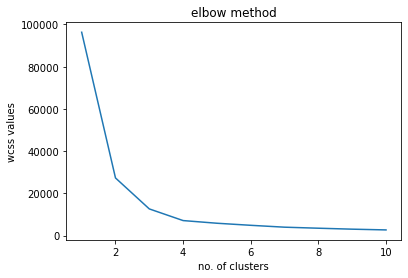

In [359]:
plt.plot(range(1,11),wcss)
plt.title('elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss values')
plt.show()


In [360]:
kmodel = KMeans(n_clusters=4, init = 'k-means++',random_state=0)

In [361]:
df_2 = pd.read_csv('vehicle_2.csv')
df_2

,Rating,Model Name,Type
0,1,TVS iQube,2-wheeler
1,1,TVS iQube,2-wheeler
2,3,TVS iQube,2-wheeler
3,1,TVS iQube,2-wheeler
4,1,TVS iQube,2-wheeler
...,...,...,...
839,2,Gemopai Ryder,2-wheeler
840,5,Gemopai Ryder,2-wheeler
841,2,Gemopai Ryder,2-wheeler
842,5,Gemopai Ryder,2-wheeler


In [362]:
df['new rating'] = df['Rating']**2

In [363]:
df

,Rating,Model Name,Type,new rating
0,1,33,0,1
1,1,33,0,1
2,3,33,0,9
3,1,33,0,1
4,1,33,0,1
...,...,...,...,...
839,2,11,0,4
840,5,11,0,25
841,2,11,0,4
842,5,11,0,25


In [364]:
X = df.iloc[:,[1,3]]
X

,Model Name,new rating
0,33,1
1,33,1
2,33,9
3,33,1
4,33,1
...,...,...
839,11,4
840,11,25
841,11,4
842,11,25


In [365]:
y_kmeans = kmodel.fit_predict(X)

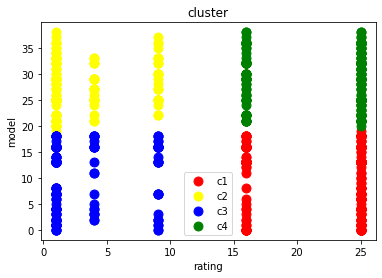

In [366]:
m = np.array(X)
plt.scatter(m[y_kmeans == 0,1], m[y_kmeans == 0,0],s=80, c='red',label='c1')
plt.scatter(m[y_kmeans == 1,1], m[y_kmeans == 1,0],s=80, c='yellow',label='c2')
plt.scatter(m[y_kmeans == 2,1], m[y_kmeans == 2,0],s=80, c='blue',label='c3')
plt.scatter(m[y_kmeans == 3,1], m[y_kmeans == 3,0],s=80, c='green',label='c4')
# plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0],s=100,c='black',label='centroids')
plt.title('cluster')
plt.xlabel('rating')
plt.ylabel('model')
plt.legend()
plt.show()

## Inference:
from the above plot, it is understood that all the models are rated between 1-5. The models rated below 3 are colored yellow and blue. The models colors red and green are all rated above 3.The ratings are cubed to have a better visualization. 

# 4 WHEELER

In [367]:
df_4 = pd.read_csv('vehicle_4.csv')
df_4

,Rating,Model nmae,Type
0,5.0,hyundai kona,4-wheeler
1,1.0,hyundai kona,4-wheeler
2,5.0,hyundai kona,4-wheeler
3,5.0,hyundai kona,4-wheeler
4,4.0,hyundai kona,4-wheeler
...,...,...,...
264,4.0,tata tigor ev,4-wheeler
265,5.0,tata tigor ev,4-wheeler
266,5.0,tata tigor ev,4-wheeler
267,5.0,tata tigor ev,4-wheeler


In [368]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_4['Model nmae'] = le.fit_transform(df_4['Model nmae'])
df_4['Type'] = le.fit_transform(df_4['Type'])

In [369]:
from sklearn.cluster import KMeans
wcss_2 = []

In [370]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state=0)
    kmeans.fit(df_4)
    wcss_2.append(kmeans.inertia_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

In [371]:
wcss_2

[1183.3178438661712,
 560.1628549781118,
 306.1140271765273,
 225.25639039140566,
 169.2247575362434,
 124.9453292450583,
 98.30258725165223,
 85.74221728321035,
 75.2468407771778,
 62.76644567885503]

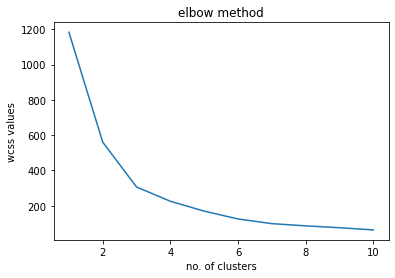

In [372]:
plt.plot(range(1,11),wcss_2)
plt.title('elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('wcss values')
plt.show()

In [373]:
kmodel = KMeans(n_clusters=4, init = 'k-means++',random_state=0)

In [374]:
df_21 = pd.read_csv('vehicle_2.csv')
df_21

,Rating,Model Name,Type
0,1,TVS iQube,2-wheeler
1,1,TVS iQube,2-wheeler
2,3,TVS iQube,2-wheeler
3,1,TVS iQube,2-wheeler
4,1,TVS iQube,2-wheeler
...,...,...,...
839,2,Gemopai Ryder,2-wheeler
840,5,Gemopai Ryder,2-wheeler
841,2,Gemopai Ryder,2-wheeler
842,5,Gemopai Ryder,2-wheeler


In [375]:
df_4['new rating'] = df_4['Rating']**2
df_4

,Rating,Model nmae,Type,new rating
0,5.0,5,0,25.0
1,1.0,5,0,1.0
2,5.0,5,0,25.0
3,5.0,5,0,25.0
4,4.0,5,0,16.0
...,...,...,...,...
264,4.0,7,0,16.0
265,5.0,7,0,25.0
266,5.0,7,0,25.0
267,5.0,7,0,25.0


In [376]:
X2 = df_4.iloc[:,[1,3]]
X2

,Model nmae,new rating
0,5,25.0
1,5,1.0
2,5,25.0
3,5,25.0
4,5,16.0
...,...,...
264,7,16.0
265,7,25.0
266,7,25.0
267,7,25.0


In [377]:
y_kmeans = kmodel.fit_predict(X2)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


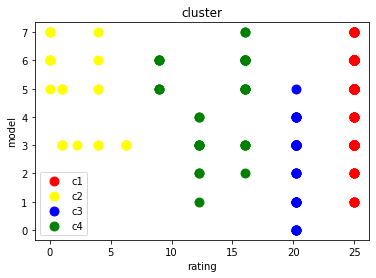

In [378]:
m = np.array(X2)
plt.scatter(m[y_kmeans == 0,1], m[y_kmeans == 0,0],s=80, c='red',label='c1')
plt.scatter(m[y_kmeans == 1,1], m[y_kmeans == 1,0],s=80, c='yellow',label='c2')
plt.scatter(m[y_kmeans == 2,1], m[y_kmeans == 2,0],s=80, c='blue',label='c3')
plt.scatter(m[y_kmeans == 3,1], m[y_kmeans == 3,0],s=80, c='green',label='c4')
# plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0],s=100,c='black',label='centroids')
plt.title('cluster')
plt.xlabel('rating')
plt.ylabel('model')
plt.legend()
plt.show()

## Inference:
It is observed that there are models rated below 3 which are colored yellow. most the green scatter points refer to the models rated 3 and 4. The models shown in blue are rated between 4 and 5.